### PCA
Principal component analysis is ML technique for feature reduction. It searches in the space of the features, latent vectors that explains the highest amount of variance among original features (original matrix). The latent features are eigenvectors in matrix decomposition with their own eigenvalues of matrix of covariance of original features. In that way, we can search the more fundamental structure of some matrix, and we can explain the high dimensional space of feature with only a few principal components which are dimension that reflect the "inner structure" of our original matrix (e.g. imagine that we applied 20 IQ tests to our subjects, and it will create a matrix with a lot of variance - some subject will underperform on some tests, due to the tiredness, attention, etc. but we should be able to extract one principal component that should reflect the global IQ of the subject). Principal components are usually not correlated (they are ortogonal in our feature space) but some rotation (oblique Promax) allows correlation between components (in our example it could be an verbal and non-verba IQ component).

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('iq.csv')

In [3]:
df.head()

,VQ1s,VQ1a,VQ1e,VQ2s,VQ2a,VQ2e,VQ3s,VQ3a,VQ3e,VQ4s,...,MQ5s,MQ5a,MQ5e,MQ6s,MQ6a,MQ6e,dateload,introelapse,testelapse,endelapse
0,4,"2,4,3,1",8382,3,"3,2,1",7460,3,"1,4,2",5213,3,...,4,"17,21,18,20",8540,3,"26,23,22",8974,2019-01-11 18:29:36,9,674,40
1,3,"4,3,1",42029,3,"1,2,3",56582,3,"4,1,2",23424,2,...,4,"20,21,17,19",10112,4,"26,71,23,25,24,22",13387,2019-01-11 18:31:22,3,703,46
2,4,"3,4,2,1",24844,2,"1,2",16019,3,"4,2,1",9387,3,...,4,"17,20,21,18",15522,5,"25,24,22,23,26",10198,2019-01-11 18:36:29,2,1627,57
3,4,"4,2,3,1",12188,2,"1,2",13542,3,"2,4,1",9309,2,...,2,"17,68,20,21",8469,3,"70,24,23,22,26",12241,2019-01-11 19:06:54,30,848,95
4,4,"1,4,2,3",9023,1,1,12651,3,"2,4,1",6089,2,...,2,"19,20,18,69",12028,0,"72,22",12396,2019-01-11 19:15:14,4,756,168


This is data from an on-line objective test advertised as "Full Scale IQ Test".
https://www.kaggle.com/mpwolke/alpha-version-iq-test/data

The test had 3 sections. The first was a vocabulary test, the second had mental rotation items, and the third was a short term memory test. Each question had 8 possible answers, of which 3-5 were correct so each question was more like a composite of several questions. A demo of the test in included.

For each question, multiple values are recorded. e.g. for the first vocabulary question:

VQ1s	The individuals score on that question. +1 point for each correct answer, -1 point for each wrong answer
VQ1a	The actual answers selected by the user for this question
VQ1e	The elapsed time in milliseconds on this question


The other values were also recorded:
dateload	
introelapse	time spent on the landing page in seconds
testelapse	time spent on the test page in seconds
endelapse	time spent on the page where they agreed to donate their data

This file only contains individuals who indicated their data was appropriate for research; records from subjects where there were indications that it was not their first time taking this were also removed.

In [4]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [5]:
df['VQ1s'].describe()

count    3194.000000
mean        3.251096
std         1.084963
min        -1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: VQ1s, dtype: float64

In [6]:
assessments = [] # we extract only columns with assessed iq tasks 
for col in df.columns:
    if col.endswith('s'):
        assessments.append(col)
assessments

['VQ1s',
 'VQ2s',
 'VQ3s',
 'VQ4s',
 'VQ5s',
 'VQ6s',
 'VQ7s',
 'RQ1s',
 'RQ2s',
 'RQ3s',
 'RQ4s',
 'RQ5s',
 'RQ6s',
 'MQ1s',
 'MQ2s',
 'MQ3s',
 'MQ4s',
 'MQ5s',
 'MQ6s']

In [7]:
df = df[assessments]

In [8]:
df.head()

,VQ1s,VQ2s,VQ3s,VQ4s,VQ5s,VQ6s,VQ7s,RQ1s,RQ2s,RQ3s,RQ4s,RQ5s,RQ6s,MQ1s,MQ2s,MQ3s,MQ4s,MQ5s,MQ6s
0,4,3,3,3,3,3,3,1,3,3,4,4,5,4,2,4,4,4,3
1,3,3,3,2,4,4,3,-1,5,4,3,4,4,4,2,3,5,4,4
2,4,2,3,3,3,3,3,1,4,4,4,4,4,3,3,4,5,4,5
3,4,2,3,2,3,4,3,3,4,4,4,4,4,4,3,4,4,2,3
4,4,1,3,2,3,2,3,0,2,1,4,1,2,4,2,3,3,2,0


In [9]:
df_missing= missing_values_table(df)
df_missing

Your selected dataframe has 19 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df)

In [11]:
import numpy as np
cov_mat = np.cov(df.T) # we create matrix of covariance
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) # We find the eigen values and eigen vectors

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[11.32384655  3.10317769  2.38987079  1.53470763  0.38844001  0.4047044
  0.43405762  0.45174528  0.56935699  0.58265879  1.26507255  0.71717052
  0.76601852  0.80238905  0.89512253  1.13175707  1.09794158  1.07614948
  0.97820066]


In [12]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)  # we calculate the percentage of variance expleind by eigen vector (principal component)

In [13]:
len(var_exp)

19

In [14]:
var_exp

[0.37856712307452156,
 0.1037422261239888,
 0.07989568777315426,
 0.05130675762325875,
 0.04229259665452779,
 0.03783573143733723,
 0.036705247090664965,
 0.03597671595775853,
 0.032702192394812174,
 0.029924810346714657,
 0.026824640651322597,
 0.025608738751444194,
 0.023975702892830887,
 0.0194788458905116,
 0.01903415390745789,
 0.015102280997196191,
 0.014510965178426144,
 0.01352965872469495,
 0.012985924529377134]

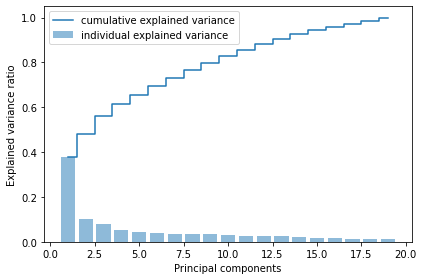

In [15]:
import matplotlib.pyplot as plt


plt.bar(range(1, 20), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 20), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/pca1.png', dpi=300)
plt.show()

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca2 = pca.fit_transform(df_std)
pca.explained_variance_ratio_

array([0.28627341, 0.12096431])

In [17]:
pca = PCA(n_components=2) # we want to extract two principal components
df_pca2 = pca.fit_transform(df_std) # we get scores on two main principal components

In [18]:
pca_data = pd.DataFrame(data=df_pca2, columns=["PC1", "PC2"], index=df.index)

In [19]:
df_std = pd.DataFrame(df_std, columns = df.columns)
df_all = df_std.merge(pca_data, how='inner', on = df.index)

In [20]:
df_all = df_all.drop('key_0', axis=1)

In [21]:
correlations = df_all.corr() # we take correlations between features and PCs

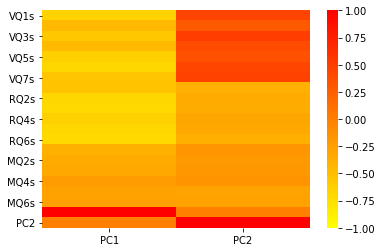

In [45]:
import seaborn as sns
correlations = correlations[['PC1', 'PC2']].apply(lambda x: round(x,2))
sns.heatmap(correlations, cmap = 'autumn_r', vmin = -1, vmax=1); # from this heatmap we clearly see
#that first component (PC1) is more correlated with manipulative tests (RQ) while second PCA2 is more connected 
#with verbal tasks